 **<p style="font-family:newtimeroman;font-size:250%;text-align:center;">Vehicle Sales Dataset EDA</p>**

# *Import Libraries*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Get a sneak peek of data

In [2]:
df = pd.read_csv("/kaggle/input/car-salescsv/1.04. Real-life example.csv")

print(type(df))

pd.options.display.max_columns
pd.options.display.max_rows

df.head()

<class 'pandas.core.frame.DataFrame'>


,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


# Data Overview and Descriptive stats

In [3]:
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage       4345 non-null   int64  
 4   EngineV       4195 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
 8   Model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB


,Price,Mileage,EngineV,Year
count,4173.000000,4345.000000,4195.000000,4345.000000
mean,19418.746935,161.237284,2.790734,2006.550058
std,25584.242620,105.705797,5.066437,6.719097
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,86.000000,1.800000,2003.000000
50%,11500.000000,155.000000,2.200000,2008.000000
75%,21700.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


# Renaming the Column Name

In [4]:
df.rename(columns={"Engine Type":"Engine_Type"}, inplace = True)
df.Engine_Type.unique()

array(['Petrol', 'Diesel', 'Gas', 'Other'], dtype=object)

In [5]:
df.columns

Index(['Brand', 'Price', 'Body', 'Mileage', 'EngineV', 'Engine_Type',
       'Registration', 'Year', 'Model'],
      dtype='object')

# Unique Values for Analysis

In [6]:
df.Brand.unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

In [7]:
df.Body.unique()

array(['sedan', 'van', 'crossover', 'vagon', 'other', 'hatch'],
      dtype=object)

In [8]:
df.Registration.unique()

array(['yes', 'no'], dtype=object)

In [9]:
df.Engine_Type.unique()

array(['Petrol', 'Diesel', 'Gas', 'Other'], dtype=object)

In [10]:
df.Year.unique()

array([1991, 1999, 2003, 2007, 2011, 2016, 1997, 2006, 2012, 1994, 2008,
       2001, 2013, 1998, 2010, 1989, 2009, 1996, 2014, 2000, 2004, 1987,
       1990, 2005, 1995, 2002, 2015, 1992, 1988, 1986, 1980, 1979, 1985,
       1993, 1969, 1984, 1978, 1983, 1982])

# *****Data Cleaning*****

# Dealing with the missing values

In [11]:
df.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine_Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [12]:
round(df.isnull().sum() / len(df) * 100)

Brand           0.0
Price           4.0
Body            0.0
Mileage         0.0
EngineV         3.0
Engine_Type     0.0
Registration    0.0
Year            0.0
Model           0.0
dtype: float64

In [13]:
df.isnull().sum().sum()

322

In [14]:
df[df.Price.isnull()]

,Brand,Price,Body,Mileage,EngineV,Engine_Type,Registration,Year,Model
17,Mercedes-Benz,NaN,van,240,2.2,Diesel,yes,2007,Vito
29,Mercedes-Benz,NaN,crossover,0,4.6,Petrol,yes,2016,GLS 500
50,Mercedes-Benz,NaN,sedan,145,3.2,Diesel,yes,2007,E-Class
55,Mercedes-Benz,NaN,crossover,0,3.0,Diesel,yes,2016,GLS 350
91,Mercedes-Benz,NaN,crossover,0,3.0,Diesel,yes,2016,GL 350
...,...,...,...,...,...,...,...,...,...
4229,Toyota,NaN,hatch,76,1.0,Petrol,yes,2007,Aygo
4231,Mercedes-Benz,NaN,crossover,27,3.0,Diesel,yes,2015,G 350
4260,BMW,NaN,crossover,0,3.0,Diesel,yes,2015,X6
4273,Volkswagen,NaN,other,197,2.0,Diesel,no,2011,T5 (Transporter)


In [15]:
df.Price.mean()

19418.746935058713

In [16]:
df.Price.min()

600.0

In [17]:
df.Price.max()

300000.0

In [18]:
df.Price.median()

11500.0

In [19]:
df.Price.mode()

0    6500.0
Name: Price, dtype: float64

In [20]:
x = df.Brand.unique()

In [21]:
y = df.Body.unique()

In [22]:
for b in x:
    for bb in y:
        mv = df.Price[(df.Brand == b) & (df.Body == bb)].mean()
        df.loc[(df.Brand == b) & (df.Body == bb), 'Price'] = df.loc[(df.Brand == b) & (df.Body == bb), 'Price'].fillna(mv)

In [23]:
df.isnull().sum()

Brand             0
Price             0
Body              0
Mileage           0
EngineV         150
Engine_Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [24]:
df = df.dropna()

In [25]:
df.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine_Type     0
Registration    0
Year            0
Model           0
dtype: int64

# Find Duplications and Drop them

In [26]:
df.duplicated().any()

True

In [27]:
df.drop_duplicates()

,Brand,Price,Body,Mileage,EngineV,Engine_Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,Corolla
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520


In [28]:
df.shape

(4195, 9)

# Value Correction

In [29]:
(df.Mileage == 0).any()

True

In [30]:
df.Mileage = df.Mileage.replace(0, df.Mileage.mean())

# Co-Relation Analysis

In [31]:
cf = df[['Price',"Mileage","EngineV","Year"]]

In [32]:
cf.corr()

,Price,Mileage,EngineV,Year
Price,1.000000,-0.367360,0.055890,0.487647
Mileage,-0.367360,1.000000,0.022211,-0.618116
EngineV,0.055890,0.022211,1.000000,-0.022866
Year,0.487647,-0.618116,-0.022866,1.000000


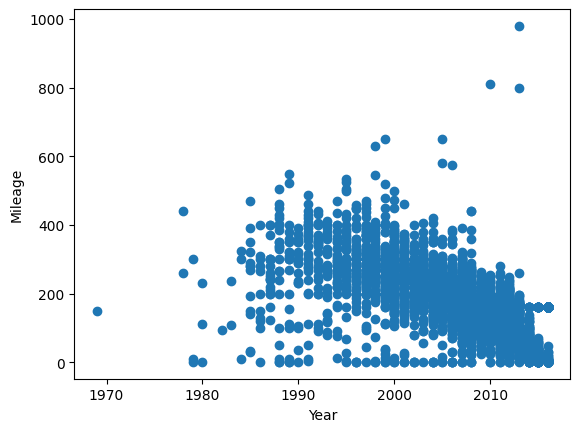

In [33]:
plt.scatter(df['Year'], df['Mileage'])
plt.xlabel('Year')
plt.ylabel('Mileage')
plt.show()

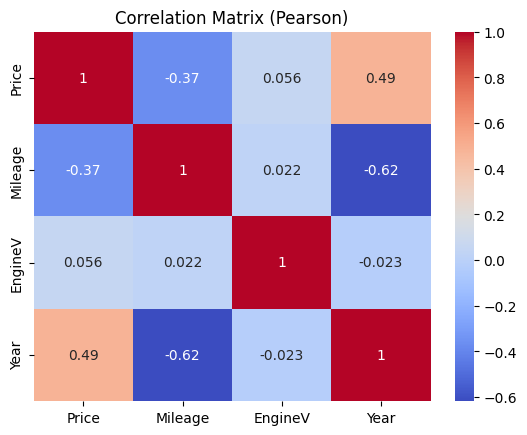

            Price   Mileage   EngineV      Year
Price    1.000000 -0.558547  0.433013  0.755276
Mileage -0.558547  1.000000  0.025357 -0.677994
EngineV  0.433013  0.025357  1.000000 -0.019520
Year     0.755276 -0.677994 -0.019520  1.000000


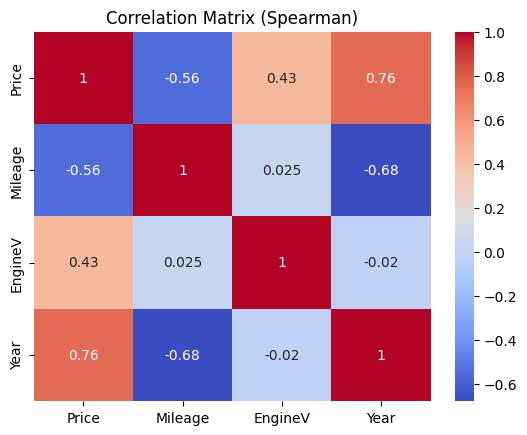

In [34]:
# Calculate Pearson correlation coefficients (default in Pandas)
correlation_matrix = cf.corr()


# Create a heatmap to visualize the correlations
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix (Pearson)")
plt.show()

# Calculate Spearman correlation coefficients (for non-linear relationships)
spearman_correlation_matrix = cf.corr(method="spearman")

# Print the Spearman correlation matrix
print(spearman_correlation_matrix)

# Create a heatmap to visualize the Spearman correlations
sns.heatmap(spearman_correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix (Spearman)")
plt.show()

# Data Distribution

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

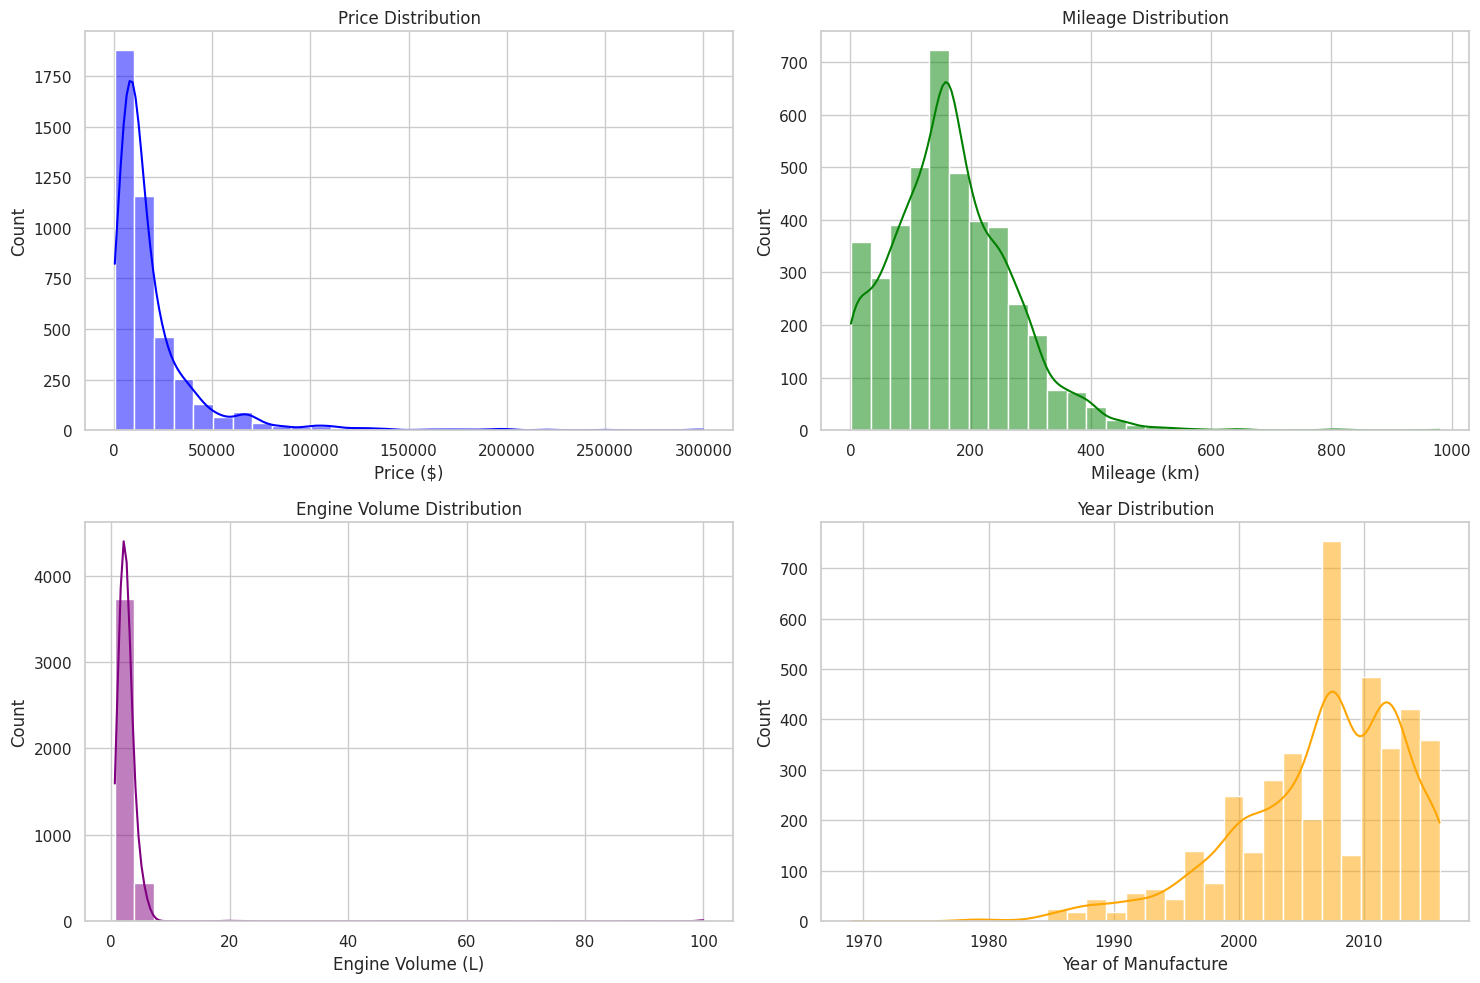

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))

# Univariate distributions
# Plot for Price
plt.subplot(2, 2, 1)
sns.histplot(df['Price'], bins=30, kde=True, color='blue')
plt.title('Price Distribution')
plt.xlabel('Price ($)')

# Plot for Mileage
plt.subplot(2, 2, 2)
sns.histplot(df['Mileage'], bins=30, kde=True, color='green')
plt.title('Mileage Distribution')
plt.xlabel('Mileage (km)')

# Plot for EngineV
plt.subplot(2, 2, 3)
sns.histplot(df['EngineV'], bins=30, kde=True, color='purple')
plt.title('Engine Volume Distribution')
plt.xlabel('Engine Volume (L)')

# Plot for Year
plt.subplot(2, 2, 4)
sns.histplot(df['Year'], bins=30, kde=True, color='orange')
plt.title('Year Distribution')
plt.xlabel('Year of Manufacture')

plt.tight_layout()
plt.show()


# Questions answers

# Based on Engine_Type and Engine Version what is the average Mileage of car?

In [36]:
# Pivot table of rating by category and customer location
pivot_table = df.pivot_table(values='Mileage', index='EngineV', columns='Engine_Type', aggfunc='mean')
pivot_table = pivot_table.dropna()
pivot_table = pivot_table[0:5]
print(pivot_table)

Engine_Type      Diesel         Gas       Other      Petrol
EngineV                                                    
1.0           54.500000   56.000000  350.000000   92.538462
1.2          117.000000  174.000000   22.000000   69.306113
1.4          136.333333  131.600000   83.000000  126.407600
1.5          152.553487   85.625000  151.714286   87.375000
1.6          140.303566  181.666667  138.333333  126.888089
1.7          221.750000  190.000000  225.000000  100.000000
1.8          168.600000  214.275862  194.090909  161.774025
1.9          230.727749  294.000000  183.200000  197.142857
2.0          154.438173  208.493976  148.362630  144.581969
2.2          211.123164  223.166667  219.000000  218.105263
2.3          293.928571  214.545455  162.000000  210.777778
2.4          307.398788  168.055556  139.000000  140.223056
2.5          228.393727  115.684211  195.090909  147.708491
2.7          250.692308  144.730769   93.000000  131.923077
2.8          163.785697  257.238095   45

/tmp/ipykernel_31/3093100092.py:4: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  pivot_table = pivot_table[0:5]


# How many Vehicles Registers by Brands Year on year?

In [37]:
# Pivot table of average rating_count by customer age group and product category
pivot_table = df.pivot_table(values='Registration', index='Year', columns='Brand', aggfunc='count')
print(pivot_table)

Brand  Audi   BMW  Mercedes-Benz  Mitsubishi  Renault  Toyota  Volkswagen
Year                                                                     
1969    NaN   NaN            1.0         NaN      NaN     NaN         NaN
1978    NaN   NaN            2.0         NaN      NaN     NaN         NaN
1979    NaN   NaN            2.0         NaN      NaN     1.0         NaN
1980    1.0   NaN            1.0         NaN      NaN     NaN         1.0
1982    NaN   NaN            NaN         NaN      NaN     NaN         1.0
1983    NaN   1.0            1.0         NaN      NaN     NaN         NaN
1984    NaN   NaN            NaN         NaN      NaN     NaN         3.0
1985    1.0   3.0            5.0         NaN      NaN     2.0         2.0
1986    2.0   1.0            2.0         2.0      1.0     NaN         3.0
1987    5.0   1.0            2.0         1.0      3.0     2.0         5.0
1988    2.0   6.0            5.0         NaN      3.0     1.0         6.0
1989    3.0   2.0            2.0      

# What is the AVG price of vehicles by their body type?

In [38]:
AVG_price_by_brand = df.groupby('Body')['Price'].mean()
print(AVG_price_by_brand)


Body
crossover    38789.430164
hatch         9778.086829
other        22525.096828
sedan        15855.943828
vagon         9958.929907
van          12726.818190
Name: Price, dtype: float64


# What is the AVG price of vehicles by their Brand and price variance?

In [39]:
grouped_df = df.groupby('Brand')['Price'].mean()
print(grouped_df)
grouped_df = df.groupby('Brand')['Price'].std()
print(grouped_df)

Brand
Audi             18965.063113
BMW              23977.971760
Mercedes-Benz    31498.210633
Mitsubishi       11404.692870
Renault           8061.161129
Toyota           22919.948389
Volkswagen       13096.313462
Name: Price, dtype: float64
Brand
Audi             18679.240017
BMW              23072.508373
Mercedes-Benz    42494.479405
Mitsubishi        6960.166490
Renault           3465.332234
Toyota           21757.292003
Volkswagen       10983.652427
Name: Price, dtype: float64


# What are the most common brands and models Sold?

In [40]:
df.groupby(["Brand","Model"])["Model"].count().sort_values(ascending=False)

Brand          Model       
Mercedes-Benz  E-Class         194
               Vito            163
Audi           A6              160
Renault        Kangoo          140
Toyota         Camry           130
                              ... 
Mitsubishi     Space Wagon       1
               Pajero Pinin      1
Mercedes-Benz  CLA 220           1
               CLA-Class         1
               A 180             1
Name: Model, Length: 309, dtype: int64

# Which car models have the highest prices within each brand?

In [41]:
df.groupby(["Brand","Model"])["Price"].mean().sort_values(ascending=False)

Brand          Model           
Mercedes-Benz  Sprinter 324        200000.000000
               GLS 63              195332.666667
               S-Guard             159040.038567
               G 63 AMG            155012.833333
               S 63 AMG            143433.166667
                                       ...      
Renault        21                    1350.000000
Volkswagen     T2 (Transporter)      1300.000000
Renault        9                     1200.000000
               5                     1150.000000
Toyota         Lite Ace              1100.000000
Name: Price, Length: 309, dtype: float64